# Example for Kernel Machine

Example adapted from
https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Create a linearly separable dataset

## Generate two clusters of points

In [ ]:
X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)

In [ ]:
X.shape

(100, 2)

In [ ]:
y.shape

(100,)

Text(0, 0.5, 'X[1]')

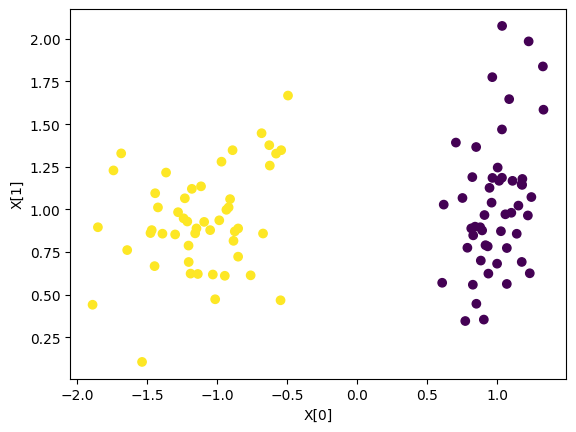

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel("X[0]")
plt.ylabel("X[1]")
# save figure to pdf
#plt.savefig('./dataset1.pdf',dpi='figure', format='pdf',bbox_inches='tight')

# Classify linearly separable data

## Separate train and test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42
    )


## Classifier (linear)

In [ ]:
clf=SVC(kernel="linear", C=0.05)
#SVC(gamma=2, C=1),

In [ ]:
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)

In [ ]:
print(score)

1.0


### Plot the classified points

In [ ]:
h = 0.02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [ ]:
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])

Text(0, 0.5, 'X[1]')

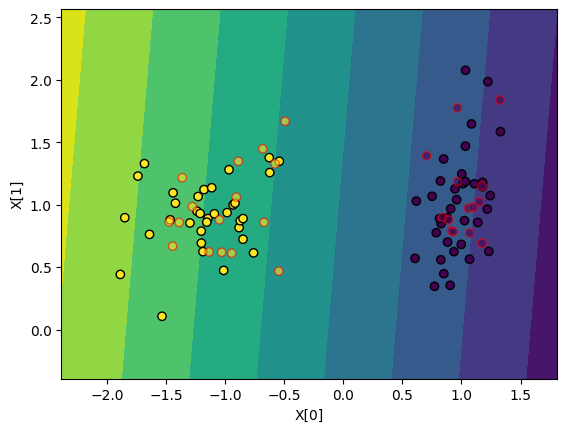

In [ ]:
 # Put the result into a color plot
Z = Z.reshape(xx.shape)
ax = plt.subplot()
ax.contourf(xx, yy, Z, alpha=1)
# Plot the training points
ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train,  edgecolors="k"
        )
# Plot the testing points
ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            edgecolors="r",
            alpha=0.6,
        )
plt.xlabel("X[0]")
plt.ylabel("X[1]")
#plt.savefig('./dataset1classified.pdf',dpi='figure', format='pdf',bbox_inches='tight')

# Classifier (Gaussian kernel)

In [ ]:
clf=SVC(gamma=4, C=1)

In [ ]:
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)

In [ ]:
print(score)

1.0


# Plot the classified points

In [ ]:
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])

Text(0, 0.5, 'X[1]')

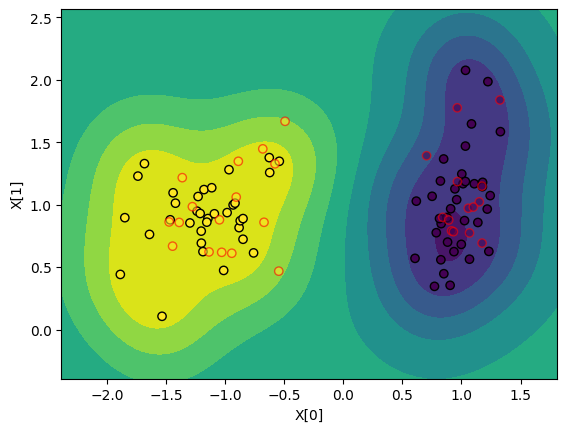

In [ ]:
 # Put the result into a color plot
Z = Z.reshape(xx.shape)
ax = plt.subplot()
ax.contourf(xx, yy, Z, alpha=1)
# Plot the training points
ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train,  edgecolors="k"
        )
# Plot the testing points
ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            edgecolors="r",
            alpha=0.6,
        )
plt.xlabel("X[0]")
plt.ylabel("X[1]")
#plt.savefig('./dataset1classifiedGaussian.pdf',dpi='figure', format='pdf',bbox_inches='tight')

# Let us create a more complex dataset (non-linearly-separable)

In [ ]:
dm=make_moons(noise=0.0, random_state=0)

In [ ]:
X, y=dm

In [ ]:
X.shape

(100, 2)

In [ ]:
y.shape

(100,)

Text(0, 0.5, 'X[1]')

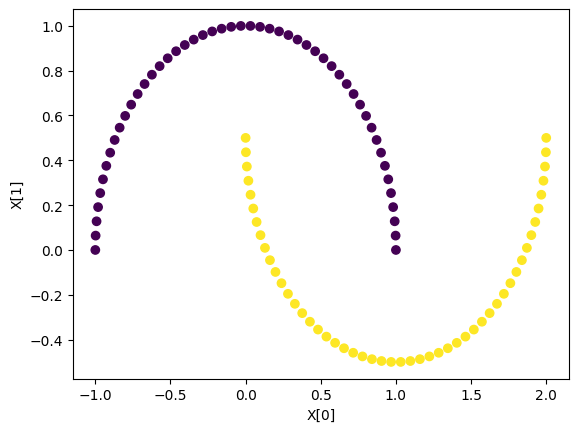

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel("X[0]")
plt.ylabel("X[1]")
#plt.savefig('./moondataset.pdf',dpi='figure', format='pdf',bbox_inches='tight')

## Moon data set with noise

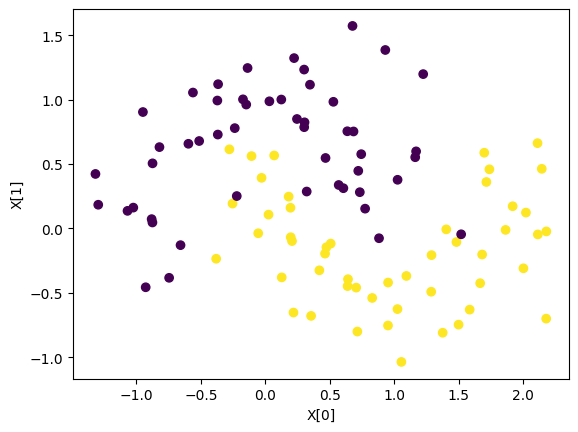

In [ ]:
dm=make_moons(noise=0.3, random_state=0)
X, y=dm
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel("X[0]")
plt.ylabel("X[1]")
plt.savefig('./moondatasetnoise.pdf',dpi='figure', format='pdf',bbox_inches='tight')

In [ ]:
### Let us generate with a different random seed for noise to see what happens

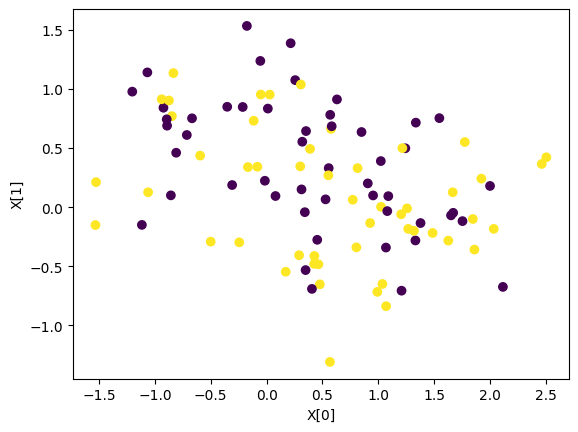

In [ ]:
dm1=make_moons(noise=0.3, random_state=1)
X1, y1=dm1
plt.scatter(X1[:, 0], X1[:, 1], c=y)
plt.xlabel("X[0]")
plt.ylabel("X[1]")
plt.savefig('./moondatasetnoise1.pdf',dpi='figure', format='pdf',bbox_inches='tight')

# Divide into train and test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42
    )


Text(0, 0.5, 'X[1]')

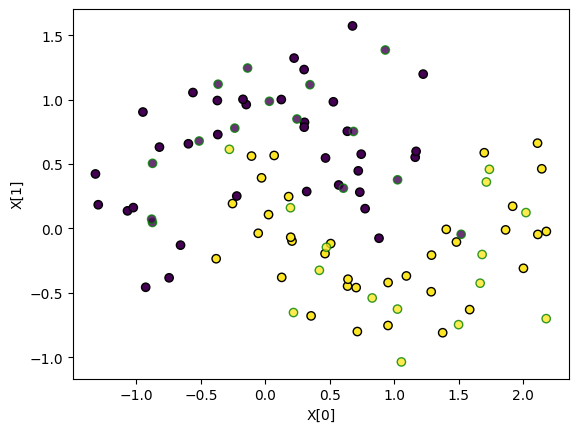

In [ ]:
ax = plt.subplot()
# Plot the training points
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors="k")
# Plot the testing points
ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, alpha=0.8, edgecolors="g"
    )
plt.xlabel("X[0]")
plt.ylabel("X[1]")


# Classifier (linear)

In [ ]:
clf=SVC(kernel="linear", C=0.05)
#SVC(gamma=2, C=1),

In [ ]:
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)

In [ ]:
print(score)

0.8666666666666667


## Plot the classified points

In [ ]:
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [ ]:
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])

Text(0, 0.5, 'X[1]')

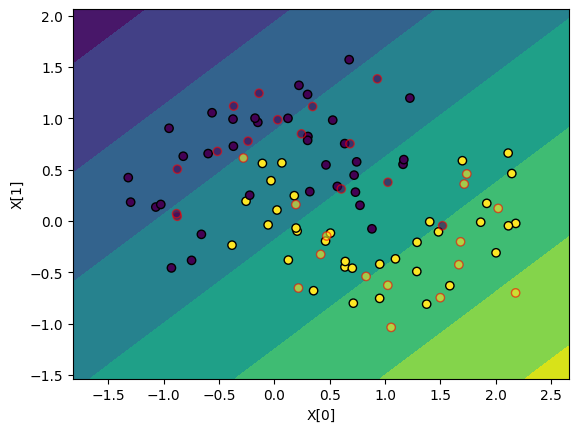

In [ ]:
 # Put the result into a color plot
Z = Z.reshape(xx.shape)
ax = plt.subplot()
ax.contourf(xx, yy, Z, alpha=1)
# Plot the training points
ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train,  edgecolors="k"
        )
# Plot the testing points
ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            edgecolors="r",
            alpha=0.6,
        )
plt.xlabel("X[0]")
plt.ylabel("X[1]")
#plt.savefig('./moondatasetnoiselinearclass.pdf',dpi='figure', format='pdf',bbox_inches='tight')

# Classifier (Gaussian kernel)

In [ ]:
clf=SVC(gamma=4, C=1)

In [ ]:
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)

In [ ]:
print(score)

0.9333333333333333


# Plot the classified points

In [ ]:
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])

Text(0, 0.5, 'X[1]')

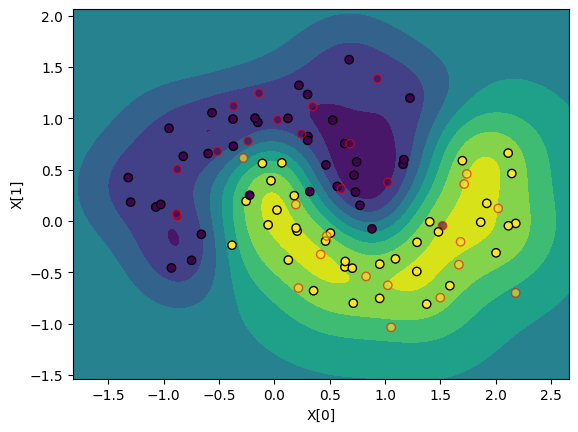

In [ ]:
 # Put the result into a color plot
Z = Z.reshape(xx.shape)
ax = plt.subplot()
ax.contourf(xx, yy, Z, alpha=1)
# Plot the training points
ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train,  edgecolors="k"
        )
# Plot the testing points
ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            edgecolors="r",
            alpha=0.6,
        )
plt.xlabel("X[0]")
plt.ylabel("X[1]")
#plt.savefig('./moondatasetnoiseNONlinearclass.pdf',dpi='figure', format='pdf',bbox_inches='tight')